# 1 Introduction

This notebook contains the experimental procedure in order to compare and visualize various undersampling and oversampling methods on simulated data.

# 2 Imports

#### 2.1 General

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

#### 2.2 scikit-learn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.datasets import make_classification

#### 2.3 imbalance-learn

In [3]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.datasets import make_imbalance

# 3 Functions

#### 3.1 Helper function

In [4]:
def measures(estimator, X, y):
    y_predicted = estimator.predict(X)
    true_positive = (y_predicted == 1)[y == 1].sum()
    false_positive = (y_predicted == 1)[y == 0].sum()
    true_negative = (y_predicted == 0)[y == 0].sum()
    false_negative = (y_predicted == 0)[y == 1].sum()
    return true_positive, false_positive, true_negative, false_negative

#### 3.2 F-measure

In [5]:
def F_measure(estimator, X, y):
    true_positive, false_positive, true_negative, false_negative = measures(estimator, X, y)
    return 2 * true_positive / (2 * true_positive + false_positive + false_negative)

#### 3.3 G-mean

In [6]:
def G_mean(estimator, X, y):
    true_positive, false_positive, true_negative, false_negative = measures(estimator, X, y)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    return sqrt(sensitivity * specificity)

# 4 Generate two-dimensional data

#### 4.1 Datasets parameters

In [7]:
datasets_parameters = [{"n_classes": 2, "class_sep": 2, "n_clusters_per_class": 1, "weights": [0.95, 0.05], "n_samples": 500, "n_features": 2, "n_redundant": 0, "n_repeated": 0, "random_state": 5}, 
                      {"n_classes": 2, "class_sep": 2, "n_clusters_per_class": 2, "weights": [0.90, 0.10], "n_samples": 1000, "n_features": 2, "n_redundant": 0, "n_repeated": 0, "random_state": 5}]

#### 4.2 Append datasets to container

In [8]:
imbalanced_datasets = []
for parameters in datasets_parameters:
    imbalanced_datasets.append(make_classification(**parameters))

#### 4.3 Plot datasets

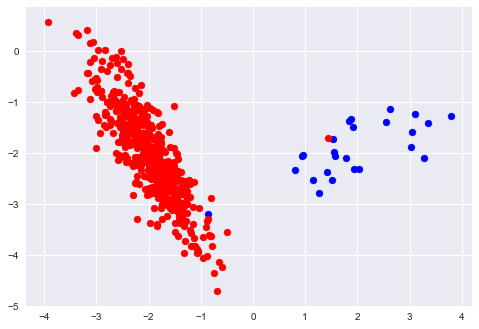

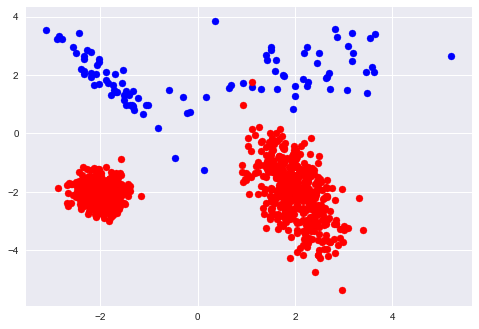

In [9]:
sns.set()
for imbalanced_dataset in imbalanced_datasets:
    X, y = imbalanced_dataset
    minority_indices = (y == 1)
    p = plt.scatter(X[minority_indices, 0], X[minority_indices, 1], color="blue")
    p = plt.scatter(X[~minority_indices, 0], X[~minority_indices, 1], color="red")
    plt.show()

In [10]:
datasets_description = pd.DataFrame({}, columns=["# of features", "# of instances", "# of minority instances", "# of majority instances", "Imbalanced Ratio"])
for ind, (X, y) in enumerate(imbalanced_datasets):
    num_features = X.shape[1]
    num_instances = y.size
    num_minority_instances = (y == 1).sum()
    num_majority_instances = (y == 0).sum()
    IR = round((y == 0).sum() / (y == 1).sum(), 2)
    datasets_description.loc[len(datasets_description)] = [num_features, num_instances, num_minority_instances, num_majority_instances, IR]
data_types = ["object", "object", "int64", "int64", "int64", "int64", "float64"]
for ind, feature in enumerate(datasets_description.columns):
    datasets_description[feature] = datasets_description[feature].astype(data_types[ind])
datasets_description

,# of features,# of instances,# of minority instances,# of majority instances,Imbalanced Ratio
0,2,500,25,475,19
1,2,1000,102,898,8


# 5 Experiment

##### 5.1 Parameters

In [11]:
cv_scores = []
metrics = ['roc_auc', F_measure, G_mean]
random_states = [5 * i for i in range(5)]

#### 5.2 Run experiment

In [12]:
for random_state in random_states:
    cv = StratifiedKFold(n_splits=5, random_state=random_state)
    algorithms = [LogisticRegression(random_state=random_state)]
    methods = [None, RandomOverSampler(random_state=random_state), SMOTE(random_state=random_state, k_neighbors=3), SMOTE(random_state=random_state, kind='borderline1', k_neighbors=3), ADASYN(random_state=random_state, n_neighbors=3)]
    for algorithm in algorithms:
        for ind, (X, y) in enumerate(imbalanced_datasets):
            for method in methods:
                for metric in metrics:
                    if method is None:
                        clf = algorithm
                    else:
                        clf = make_pipeline(method, algorithm)
                    cv_scores.append(cross_val_score(clf, X, y, cv=cv, scoring=metric).mean())
cv_scores

[0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.91344211344211335,
 0.97464679478857585,
 0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.6743930905695612,
 0.95209522155876569,
 0.99423828736957243,
 0.96483953786906296,
 0.97383907528192348,
 0.99401124708107957,
 0.94603041921309217,
 0.97161852946483251,
 0.99395149419171758,
 0.95066456555455559,
 0.97216228897516077,
 0.99384846738198684,
 0.77661585365853658,
 0.9440225197708898,
 0.99305857054181068,
 0.55391062578071482,
 0.89212527955601506,
 0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.88427128427128421,
 0.9725187994956922,
 0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.95959595959595956,
 0.97783002186191914,
 0.99957894736842101,
 0.6743930905695612,
 0.95209522155876569,
 0.99423828736

#### 5.3 Results parameters

In [13]:
algorithms_names = ["LR"]
datasets_names = ["two_dim_data1", "two_dim_data2"]
metrics_names = ["AUC", "F", "G"]
methods_names = ["None", "Random", "SMOTE", "Borderline SMOTE", "ADASYN"]

#### 5.4 Mean results

In [14]:
mean_cv_scores = np.array(cv_scores).reshape(len(random_states), -1).mean(axis=0).reshape(len(algorithms), len(imbalanced_datasets), len(methods), len(metrics))
mean_results = pd.DataFrame()
for ind1, alg_name in enumerate(algorithms_names):
    for ind2, ds_name in enumerate(datasets_names):
        partial_results = pd.DataFrame(mean_cv_scores[ind1, ind2, :, :].transpose(), columns=methods_names)
        partial_results.insert(0, "Metric", metrics_names)
        partial_results.insert(0, "Dataset", ds_name)
        partial_results.insert(0, "Algorithm", alg_name)
        mean_results = pd.concat([mean_results, partial_results])
mean_results = mean_results.reset_index(drop=True)

#### 5.5 Standard deviation results

In [15]:
std_cv_scores = np.array(cv_scores).reshape(len(random_states), -1).std(axis=0).reshape(len(algorithms), len(imbalanced_datasets), len(methods), len(metrics))
std_results = pd.DataFrame()
for ind1, alg_name in enumerate(algorithms_names):
    for ind2, ds_name in enumerate(datasets_names):
        partial_results = pd.DataFrame(std_cv_scores[ind1, ind2, :, :].transpose(), columns=methods_names)
        partial_results.insert(0, "Metric", metrics_names)
        partial_results.insert(0, "Dataset", ds_name)
        partial_results.insert(0, "Algorithm", alg_name)
        std_results = pd.concat([std_results, partial_results])
std_results = std_results.reset_index(drop=True)

#### 5.6 Oversampling methods ranking

In [16]:
ranking = mean_results.apply(lambda row: len(row[3:]) - row[3:].argsort().argsort(), axis=1)
aggregated_ranking = round(pd.concat([mean_results[["Algorithm", "Metric"]], ranking], axis=1).groupby(["Algorithm", "Metric"]).mean(), 2)
aggregated_ranking

None  Random  SMOTE  Borderline SMOTE  ADASYN
Algorithm Metric                                               
LR        AUC      3.0     3.5    2.5               3.0     3.0
          F        1.5     3.5    2.5               2.5     5.0
          G        1.5     3.5    2.5               2.5     5.0

#### 5.7 Friedman test

In [17]:
friedman_results = pd.DataFrame({}, columns=["Algorithm", "Metric", "p-value"])
for alg_name in algorithms_names:
    for metric_name in metrics_names:
        partial_ranking = pd.concat([mean_results[["Algorithm", "Metric"]], ranking], axis=1)[(mean_results["Algorithm"] == alg_name) & (mean_results["Metric"] == metric_name)]
        friedman_inputs = []
        for method_name in methods_names:
            friedman_inputs.append(partial_ranking[method_name])
        pvalue = round(scipy.stats.friedmanchisquare(*friedman_inputs).pvalue, 2)
        friedman_results.loc[len(friedman_results)] = [alg_name, metric_name, pvalue]
friedman_results

,Algorithm,Metric,p-value
0,LR,AUC,0.98
1,LR,F,0.23
2,LR,G,0.23
